# 빅데이터 실습 9주

## 1. 커널 서포트 벡터 머신

### 연습용 데이터 세트

#### make_blobs 데이터 세트를 이용해 데이터 분류

In [3]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=4, random_state = 8)
y = y % 2

print("데이터 크기:",X.shape)
print("처음 5 행 n", X[:5])

데이터 크기: (100, 2)
처음 5 행 n [[-1.72161036 -1.48033142]
 [-3.6573384  -9.5482383 ]
 [ 7.0778163   0.99508772]
 [-1.36579859 -0.3148625 ]
 [-2.66521206 -3.12591651]]


In [4]:
print(X[:,0], X[:,1])

[-1.72161036 -3.6573384   7.0778163  -1.36579859 -2.66521206  7.63027116
 -5.27144331  7.91767139 -1.41284184 -1.01519039  8.2634157   6.96767867
 -0.84779249  7.48006237  7.71454967 -7.74064658 -5.41087235 -2.27579204
 -1.25668449  7.61227907  8.81545663  7.1895354   7.40292703  5.17209648
 -2.10476115  6.5342397   7.59635095 -0.6560501  -4.86090778  8.90864428
  8.09770696 -0.79757091  9.92897802 -1.36106796  5.5987887  -4.98457333
 -0.57094074  6.28516091  7.46833627 -5.54704895  7.71891403 -0.35871708
 -3.71313291 -5.73423505  7.29433984 -5.91698308  8.23775366  8.91111219
  7.31164869  7.49954     7.15741276 -5.24568764  7.40565933  8.32813617
 -0.05919026 -5.8559969  -5.9232326  -6.65506667  7.49985237 -2.04751119
 -3.57485395 -5.89890454  9.85640178 -6.78464252  6.34526126  6.77299778
 -1.45137298  7.88011867  9.19642422  7.94310647  6.57242965 -6.87196564
  7.31294296  5.19332032  7.09022949  9.17061801 -1.34457765 -5.59306958
 -2.76538887  7.38527197 -6.55585067  5.82259795 -0

Text(0, 0.5, '피처 1')

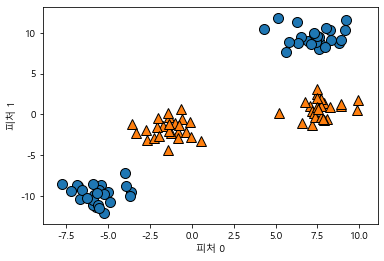

In [5]:
import mglearn
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

mglearn.discrete_scatter(X[:, 0], X[:, 1],y)
plt.xlabel("피처 0")
plt.ylabel("피처 1")

#### 선형 SVM 적용한 결과

C:\Users\kyy80\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Text(0, 0.5, '피처 1')

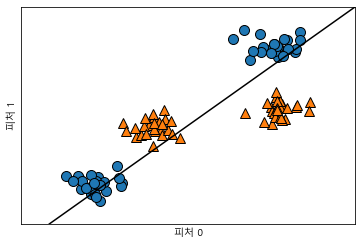

In [6]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC ().fit(X,y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("피처 0")
plt.ylabel("피처 1")

- 직선으로 2개 집단을 분류하기가 불가능하다

#### 2 번째 열의 데이터를 제곱하여 새로운 열로 추가

In [7]:
import numpy as np

X_new = np.hstack ([X, X[:, 1:]**2])

#### 3차원 그래프 그리기

Text(0.5, 0, '피처 1**2')

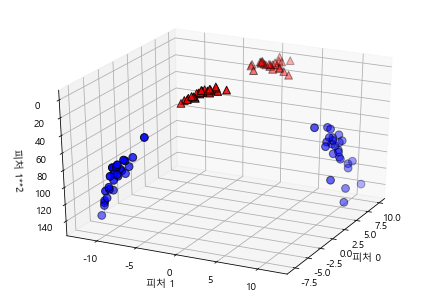

In [8]:
from mpl_toolkits.mplot3d import Axes3D, axes3d

figure = plt.figure()

ax = Axes3D(figure, elev = -152, azim = -26)
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask,2],
           c='b',cmap =mglearn.cm2, s=60, edgecolor = 'k')

ax.scatter(X_new [~mask, 0], X_new [~mask, 1], X_new [~mask,2],
           c='r', marker = '^', cmap =mglearn.cm2, s=60, edgecolor = 'k')
ax.set_xlabel("피처 0")
ax.set_ylabel("피처 1")
ax.set_zlabel("피처 1**2")

#### 3차원 공간을 사용하면 선형 모델을 이용해서도 분류가 가능

C:\Users\kyy80\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Text(0.5, 0, '피처 1**2')

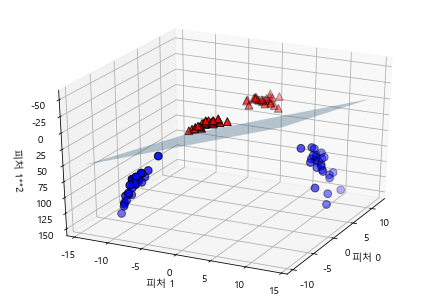

In [9]:
linear_svm_3d = LinearSVC ( ).fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel( ), linear_svm_3d.intercept_
figure =plt.figure()
ax = Axes3D(figure, elev = -152, azim = -26)
xx = np.linspace(X_new[:, 0].min()-2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1]. min()-2, X_new[:, 1]. max() + 2, 50)

XX, YY = np.meshgrid (xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride =8, cstride =8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask,2],
           c='b',cmap =mglearn.cm2, s=60, edgecolor = 'k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask,2],
           c='r', marker = '^', cmap =mglearn.cm2, s=60, edgecolor = 'k')
ax.set_xlabel("피처 0")
ax.set_ylabel("피처 1")
ax.set_zlabel("피처 1**2")

- 처음의 2가지 피처를 기준으로 이 선형 SVM 모델을 보면 직선에 가까운 타원형을 보여준다

Text(0, 0.5, '피처 1')

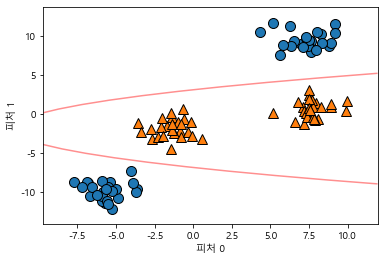

In [10]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contour(XX, YY, dec.reshape(XX.shape), [dec.min (), 0, dec.max()],
            cmap = mglearn.cm2, alpha = 0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1],y)
plt.xlabel("피처 0")
plt.ylabel("피처 1")

### 커널 기법(가우시안 커널)

- 선형 SVM 으로 분류가 어려운 데이터 세트에 새로운 피처 (기존 피처를 제곱하여 만듦)를 추가하여 분류가 가능하게 하였다

Text(0, 0.5, '피처 1')

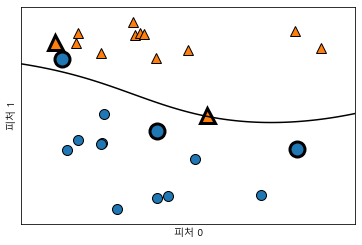

In [11]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel = 'rbf', C=10, gamma=0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm , X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1],y)
sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv [:, 0], sv [:, 1], sv_labels , s=15, markeredgewidth = 3)
plt.xlabel("피처 0")
plt.ylabel("피처 1")

### SVM 매개변수 튜닝

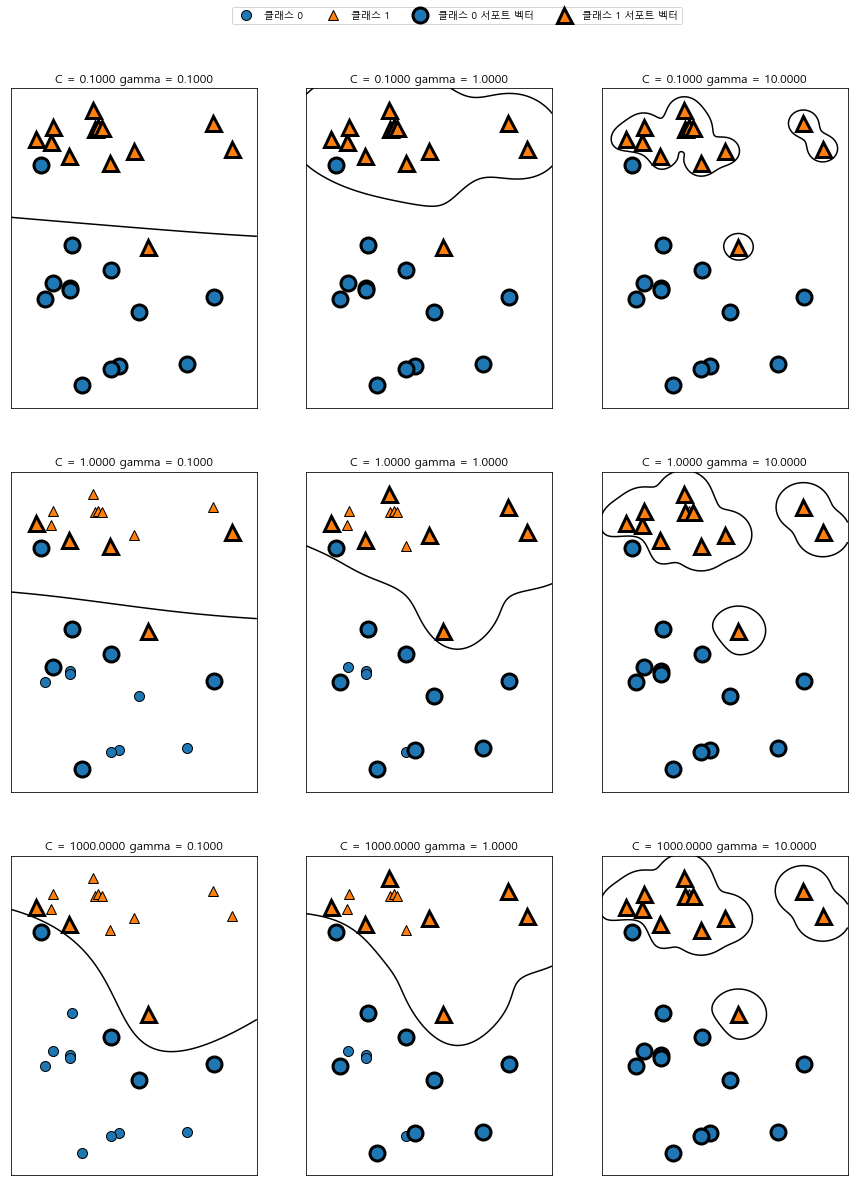

In [12]:
fig, axes = plt.subplots (3, 3, figsize =(15, 20))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma =gamma, ax= a)

axes[0, 0].legend(["클래스 0", "클래스 1", "클래스 0 서포트 벡터",
                   "클래스 1 서포트 벡터"], ncol = 4, loc =(.9, 1.2))

- 오른쪽으로 이동하면서 gamma 매개변수를 0.1에서 10으로 증가 -> 결정 경계가 포인트에 민감해진다. 큰 gamma 값은 더 복잡한 모델을 만든다
- 아래로 이동하면서 C 매개변수를 0.1에서 1000으로 증가 -> 모델에 영향을 주어 결정 경계를 곡선으로 만든다

## 분류 예측의 불확실성 추정

### GradientBoostingClassifier 분류기

#### 인위적으로 만든 2 차원 데이터 세트를 이용해 비교한다

In [13]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X, y = make_circles(noise = 0.25, factor = 0.5, random_state = 1)

y_named = np.array (["blue", "red"])[y]

X_train, X_test, y_train_named, y_test_named, y_train,y_test = train_test_split(X, y_named , y, random_state = 0)

gbrt = GradientBoostingClassifier(random_state = 0)
gbrt.fit(X_train , y_train_named)

GradientBoostingClassifier(random_state=0)

#### predict_proba 예측 확률

In [14]:
print("X_test.shape :", X_test.shape)
print("predict_proba 값의 형태 :", gbrt.predict_proba(X_test).shape)

X_test.shape : (25, 2)
predict_proba 값의 형태 : (25, 2)


#### 결정 경계와 클래스 1의 확률 그리기

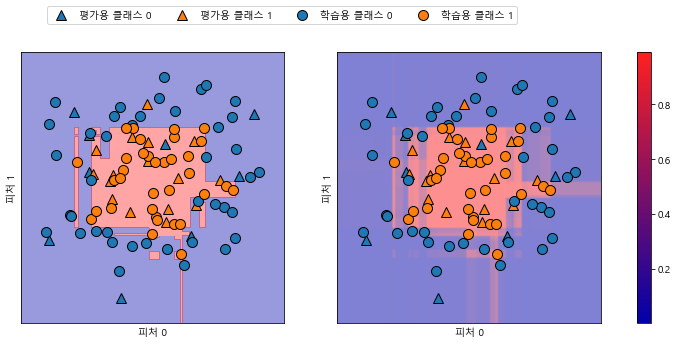

In [15]:
fig, axes = plt.subplots (1, 2, figsize = (13,5))
mglearn.tools.plot_2d_separator(
    gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(
    gbrt, X,ax=axes[1], alpha =.5, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    mglearn.discrete_scatter(X_test[:,0], X_test [:,1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train,
                             markers = 'o', ax=ax)
    ax.set_xlabel("피처 0")
    ax.set_ylabel("피처 1")

cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["평가용 클래스 0", "평가용 클래스 1", "학습용 클래스 0",
                "학습용 클래스 1"], ncol =4, loc =(.1,1.1))

- 왼쪽 그림이 결정 경계이며 , 오른쪽 그림이 클래스 1의 확률이다